<a href="https://colab.research.google.com/github/hannahcyrus/musicRecommedation_AI_ML/blob/main/music_recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
songs=pd.read_csv("/content/drive/MyDrive/ai_ml/project/spotify dataset/SpotifyFeatures.csv")
songs1=pd.read_csv("/content/drive/MyDrive/ai_ml/project/SpotifySongs.csv")

In [3]:
songs.info()
songs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [30]:
songs1.isna()

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


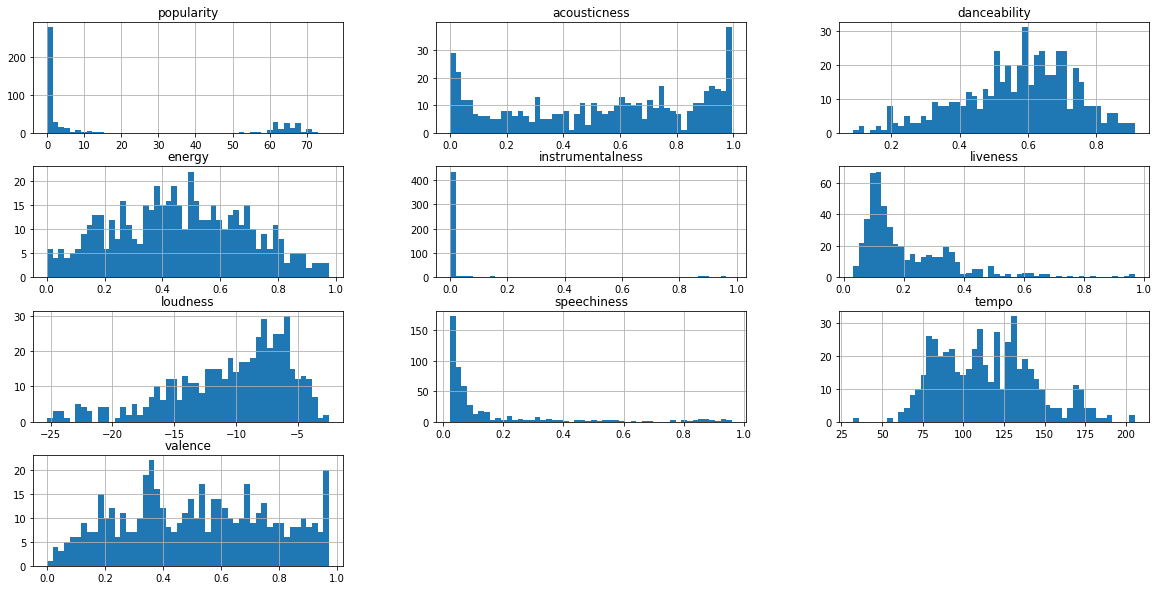

In [5]:

songs=songs.iloc[1:500,:]
songs[['popularity', 'acousticness', 'danceability', 'energy', 
           'instrumentalness', 'key','liveness','loudness', 'mode', 'speechiness',
           'tempo', 'valence']].hist(bins=50,figsize=(20,10))
plt.show()


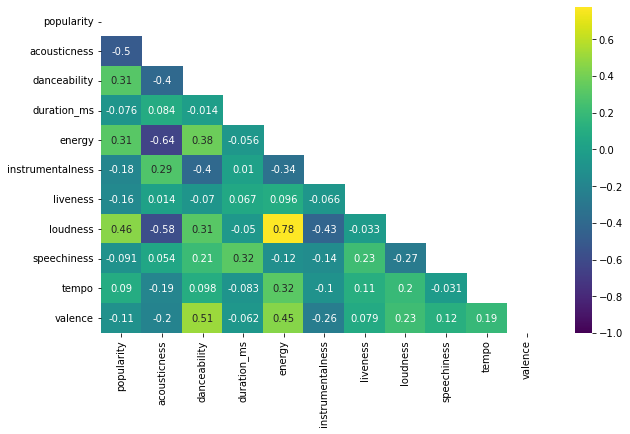

In [6]:
plt.figure(figsize=(10,6))

corr = songs.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=True
            )

In [7]:
corr[abs(corr['popularity']) > 0.25]['popularity']

popularity      1.000000
acousticness   -0.495184
danceability    0.308690
energy          0.314990
loudness        0.458213
Name: popularity, dtype: float64

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [9]:
columns_to_cluster = ['Acousticness', 'Danceability', 'Energy','Instrumentalness', 'Liveness','Valence', 'Tempo','Speechiness', 'Loudness','Popularity']
mms = MinMaxScaler()

songs_scaled = mms.fit_transform(songs1[columns_to_cluster])
print("user data: ", songs_scaled[0,:])


user data:  [1.37646947e-02 9.16308527e-01 6.83242299e-01 4.19651996e-05
 8.89212828e-02 6.09500374e-01 5.16316994e-01 6.15384615e-02
 9.59882844e-01 6.39175258e-01]


In [10]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled','popularity_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)

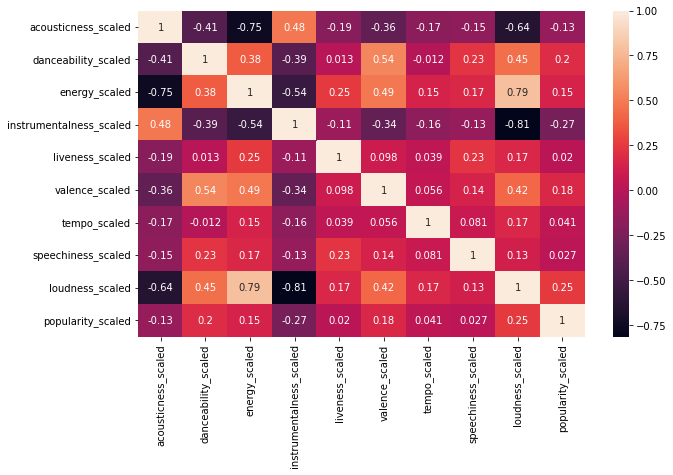

In [11]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df_songs_scaled.corr(), annot=True)
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(songs1["ArtistName"]).toarray()
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(songs_scaled)
                               

In [13]:
similarity

array([[1.        , 0.9514282 , 0.83674894, ..., 0.95756324, 0.91225224,
        0.65150736],
       [0.9514282 , 1.        , 0.88519223, ..., 0.96899614, 0.9136801 ,
        0.75601539],
       [0.83674894, 0.88519223, 1.        , ..., 0.94800135, 0.85590888,
        0.91179296],
       ...,
       [0.95756324, 0.96899614, 0.94800135, ..., 1.        , 0.9181773 ,
        0.81528799],
       [0.91225224, 0.9136801 , 0.85590888, ..., 0.9181773 , 1.        ,
        0.75412562],
       [0.65150736, 0.75601539, 0.91179296, ..., 0.81528799, 0.75412562,
        1.        ]])

In [14]:
similarity.shape

(3731, 3731)

In [15]:
songs1

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
1,Falling,Trevor Daniel,84,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382
2,Shayad,Pritam,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,Genda Phool (feat. Payal Dev),Badshah,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,Back To Black,Amy Winehouse,79,0.766,0.706,7,-6.553,0,0.1600,0.2230,0.000280,0.0640,0.766,142.989,172598
3727,Where Do We Go From Here,Charles Bradley,69,0.735,0.784,11,-7.128,0,0.0332,0.4490,0.154000,0.1050,0.582,120.012,191000
3728,Way down We Go - Stripped,KALEO,60,0.701,0.463,6,-7.212,0,0.0416,0.3570,0.003060,0.0730,0.352,139.941,313800
3729,Let's Talk It Over,Lee Fields,54,0.595,0.628,1,-9.449,0,0.3170,0.1830,0.315000,0.1220,0.170,102.029,230000


In [16]:
def recommend(song):
    index = songs1[songs1['SongName'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(songs1.iloc[i[0]].SongName)
        

In [17]:
recommend("Shayad")

Riha
WITHOUT YOU
Dior
Bandey
Before You Go


In [18]:
import pickle


In [19]:
pickle.dump(songs1,open('song_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [20]:
%%writefile app.py

import pickle
import streamlit as st
import requests


def recommend(song):
    index = songss[songss['SongName'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_song_names = []
    for i in distances[1:6]:
        
        #track_id = songss.iloc[i[0]].track_id
        
        recommended_song_names.append(songss.iloc[i[0]].SongName)

    return recommended_song_names


st.header('Music Recommender System')
songss = pickle.load(open('song_list.pkl','rb'))
similarity = pickle.load(open('similarity.pkl','rb'))

song_list = songss['SongName'].values
selected_song= st.selectbox(
    "Type or select a movie from the dropdown",
    song_list
)

if st.button('Show Recommendation'):
    recommended_song_names = recommend(selected_song)
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.text(recommended_song_names[0])
        
    with col2:
        st.text(recommended_song_names[1])
        

    with col3:
        st.text(recommended_song_names[2])
       
    with col4:
        st.text(recommended_song_names[3])
        
    with col5:
        st.text(recommended_song_names[4])
       

Writing app.py


In [21]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 184 kB/s 
     |████████████████████████████████| 77 kB 2.6 MB/s 
     |████████████████████████████████| 164 kB 41.8 MB/s 
     |████████████████████████████████| 181 kB 15.5 MB/s 
     |████████████████████████████████| 111 kB 47.9 MB/s 
     |████████████████████████████████| 4.3 MB 38.8 MB/s 
     |████████████████████████████████| 63 kB 635 kB/s 
     |████████████████████████████████| 131 kB 16.6 MB/s 
     |████████████████████████████████| 428 kB 46.9 MB/s 
     |████████████████████████████████| 793 kB 19.4 MB/s 
     |████████████████████████████████| 130 kB 49.7 MB/s 
     |████████████████████████████████| 381 kB 41.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [22]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-24 03:53:42.801 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.192.108:8501

npx: installed 22 in 4.562s
your url is: https://cold-tires-pay-35-196-192-108.loca.lt
  Stopping...
^C
